In [ ]:
# google drive mount
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install dataprep

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 19.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.5/18.5 MB 48.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.6/133.6 kB 13.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 44.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 42.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 42.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 63.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 764.0/764.0 kB 40.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 62.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 72.0 MB/s eta 0:00:00
  Created wheel for sqlalchemy: filena

In [ ]:
# module import section
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt

In [ ]:
from dataprep.eda import create_report

In [ ]:
# load training set
base_path = '/content/drive/MyDrive/LG-Aimers/phase2'
train_df = pd.read_csv(f'{base_path}/train.csv')

In [ ]:
train_df['customer_country'][train_df['customer_country'].fillna('0').str.contains('@')]

816                          abdohabrouk@gmail.com
817                           eslam.fiky@gmail.com
818                           mhaleem@proegypt.net
819                           ihabsaad@hotmail.com
820               Mohamed_mohamed@almansour.com.eg
                           ...                    
45216                 /Ochandia@airsystem.cl/Chile
45217                 /Ochandia@airsystem.cl/Chile
47208    doctoradc@msn.com  /Pieve di cadore/Italy
47229    doctoradc@msn.com  /Pieve di cadore/Italy
58843                /f.clima@hotmail.com/Colombia
Name: customer_country, Length: 76, dtype: object

# 사전 지식

## MQL (Marketing Qualified Lead)과 SQL (Sales Qualifying Lead)
### 마케팅에서 *Lead*는 무슨 뜻일까?
상품이나 서비스에 관심을 가지고 연락을 취한 개인이나 단체 (= 고객)
- 아직은 상품, 서비스에 엄청난 관심을 보이고 있지는 않은 고객

### MQL
이미 상품, 서비스의 회사와 관계를 맺은 상태이며 올바른 영업을 통해 잠재고객이 될 수 있는 리드

### SQL
MQL이었다가 상품에 대한 관심도가 더욱 높아진 고객
- **MQL에게 적절한 영업자원을 투자하여 SQL로 "전환"시키는 것이 중요함**

### 어떤 MQL이 SQL이 될 가능성이 높을까?
#### 판단 지표: BANT
- Budget
  - 상품, 서비스를 구매할 수 있는 자금력이 있는가?
- Authroity
  - 의사 결정권자인가?
- Need
  - 해당 고객에게 우리의 상품, 서비스가 필요한가?
- Timing
  - 지금이 구매하기에 적절한 시기인가?

# EDA INSIGHT (59299 x 29)

## 수치형 특성 중에는 is_converted와 큰 연관이 있는게 없음
- Dataprep interaction 이용해서 판단함
- 수치형 특성: bant_submit, com_reg_ver_win_rate, customer_idx, historical_existing_cnt, id_strategic_ver, it_strategic_ver, idit_strategic_ver, lead_desc_length, ver_cus, ver_pro, ver_win_rate_x, ver_win_ratio_per_bu, lead_owner
- regression으로 변환할 수 있을 만한 feature가 보이지 않음

## 범주형 특성인 경우
- 범주형 특성: customer_country
- customer_country는 시도해볼 가치는 있는 것 같음
  - 물론 train set에 과적합된 것이거나, 충분한 샘플이 없어서 그런것일 수 있으나 시도는 해보자

- 주로 숙박(hotel & accommodation), 사무직(office) 사업을 하는 고객이 IT, ID 쪽 서비스에 많이 관심을 가짐
- AS의 경우 다양한 사업을 하는 고객이 요청

## Feature 정리 (29개)

- bant_submit
  - BANT 점수
  - BANT 점수가 높을 수록 SQL로 전환될 확률이 높다고 생각할 수도 있음 (regression에 사용 가능할지도)
  - number이면서 categorical하기도 함
  - 가능한 값: 0, 0.25, 0.5, 0.75, 1 (train set 한정일 수도 있음)
  - 결측치 없음
  - 범위: 0~1

- customer_country
  - 고객의 국가
  - categorical
  - 종류는 15399개, //India가 제일 많음
  - /도시/국가 형태
  - 결측치 조금 있음

- business_unit
  - MQL(고객)의 요청 상품에 대응되는 사업부, 고객이 관심있는 상품을 담당하는 사업부
  - categorical
  - 결측치 없음
  - 도메인: AS, ID, IT, CM, Solution 무슨뜻?
  - AS, ID가 대부분, IT 조금, CM, Solution은 거의 없음

- com_reg_ver_win_rate
  - Vertical Level 1 (기업의 수직 구조에서 최상위), business unit (사업부), region을 기준으로 oppty 비율을 계산
  - oppty 비율: 가능성 있는 비즈니스 기회에 대한 상대적인 비율
  - number type
  - 결측치 많음
  - 도메인: 0~1, 대부분의 값이 0.0~0.2 사이이며 0.64 쯤에서도 몇개 있음

- customer_idx
  - 고객의 회사명
  - number이면서 categorical한 느낌있음
  - 결측치 없음
  - 47466, 25096 회사가 독보적으로 많았음(multimodal distribution?)
  - multimodal이니까 mode 중심으로 rbf_kernel 해볼까?
  - 회사의 숫자 간 가깝고 먼 정도가 상관이 있는 것일까?

- customer_type
  - 고객의 유형
  - categorical
  - 33개 종류
  - End customer, End-customer 같은거 아님?
  - End customer (소비자)가 제일 많았고 그 다음은 channel partner, specifier/influencer
  - 결측치 많음

- enterprise
  - 아마도 리드 기업의 규모
  - 도메인: 대기업(Enterprise), 중소기업(SMB)
  - categorical

- historical_existing_cnt
  - 이전에 MQL이었다가 SQL로 전환되었던 횟수 (= 영업 성공 횟수)
  - numeric
  - 결측치 있음
  - 대체로 19회 이하, 0회도 많음
  - is_converted와의 관계를 보고 마찬가지로 regression 후보로 사용할 수도?

- id_strategic_ver
  - 특정 사업부, 사업 영역에 대한 가중치
  - numeric
  - 결측치 많음
  - 있는 값은 다 1
  - business_unit과 연관성이 있는지 봐야함 (혹시 ID 사업부 가중치라서 id_strategic_ver인가?)
  - 전처리 과정에서 없는 값은 0으로 채워도 될듯?

- it_strategic_ver
  - 특정 사업부, 사업 영역에 대해 가중치 부여
  - numeric
  - 결측치 많음
  - 있는 값은 다 1
  - id와 마찬가지로 상관관계 확인해보아야 함

- idit_strategic_ver
  - id_strategic_ver, it_strategic_ver 중 하나라도 1이면 1

- customer_job
  - customer_type이랑 유사한가?
  - 고객의 직업군
  - 결측치 많음
  - categorical
  - 560개의 종류
  - value_counts 해봤을 때 top 100 이후부터는 거의 1개
  - 엔지니어가 많고 그다음이 기타 등등, 관리직, 교육

- lead_desc_length
  - 고객이 작성한 Lead Description 텍스트의 총 길이
  - 100이하에 몰려있음 (3이 제일 많음)
  - 결측치 없음

- inquiry_type
  - 고객의 문의 유형
  - Quotation or Purchase consultation, Quotation or purchase consultation 전처리할 때 하나로 합쳐줘야 할듯?
  - 도메인: 71개의 값이 있음.
  - 견적 요청이나 가격/제품 문의가 가장 많은 듯. 그 이외는 그닥 많지 않음
  - 결측치 일부 있음

- product_category
  - 요청 제품 카테고리
  - 도메인: 357개의 값이 있음
  - 결측치 있음

- product_subcategory
  - 요청 제품 하위 카테고리
  - 도메인: 330개 값이 있음
  - 결측치 많음

**subcategory가 있어야 modelname이 있음**

- product_modelname
  - 요청 제품 모델명
  - 도메인: 665개의 값이 있음
  - 결측치 많음

- customer_country.1
  - 담당 자사 법인명 기반의 지역정보 (대륙)
  - categorical
  - 도메인: 15399개 값이 있음
  - 결측치 아주 적음

- customer_position
  - 고객의 회사 직책
  - 결측치 없음
  - categorical
  - 도메인: 117개의 종류가 있으나 none 이 가장 많음

- response_corporate
  - 담당 자사 법인명
  - categorical
  - 결측치 없음
  - 도메인: 52개
  - LGEIL (압도적으로 많음), LGESP, LGEUS 가 순서대로 가장 많음

- expected_timeline
  - 고객의 요청한 처리 일정
  - 결측치 많음
  - categorical
  - 도메인: 449개의 값
  - 3개월 단위로 끊겨 있는 것도 있으나 discussed with client 와 같은 것들도 있음
  - 이것도 하나로 합쳐야 할까?
  - 나중에 숫자로 인코딩할 수도 있을듯

- ver_cus
  - 특정 Vertical Level 1(사업영역) 이면서 Customer_type (고객유형)이 소비자인 경우에 대한 가중치
  - 결측치 없음
  - customer_type과 연관성을 확인해봐야함

- ver_pro
  - 특정 Vertical Level 1(사업영역) 이면서 특정 Product Category (제품유형)인 경우에 대한 가중치
  - 결측치 없음
  - product_category와 연관성을 확인해봐야함

- ver_win_rate_x
  - 전체 Lead 중에서 Vertical을 기준으로 Vertical 수 비율과 Vertical 별 Lead 수 대비 영업 전환 성공 비율 값을 곱한 값
  - 결측치 많음

- ver_win_ratio_per_bu
  - 전체 Lead 중에서 Vertical을 기준으로 Vertical 수 비율과 Vertical 별 Lead 수 대비 영업 전환 성공 비율 값을 곱한 값
  - 특정 Vertical Level1의 Business Unit 별 샘플 수 대비 영업 전환된 샘플 수의 비율을 계산
  - 결측치 많음

- business_area
  - 고객의 사업 영역
  - categorical
  - 도메인: 12개의 분야가 있음
  - 결측치 많음

- business_subarea
  - 고객의 세부 사업 영역
  - 도메인: 16개의 분야가 있음
  - 결측치 많음

- lead_owner
  - 영업 담당자 이름
  - number로 표현되어 있지만 categorical
  - 도메인: 900여개 이상의 담당자가 있음
  - 결측치 없음

- is_converted (Target label)
  - 영업 성공 여부

## Dataprep

In [ ]:
label_columns = [
    "customer_country",
    "business_subarea",
    "business_area",
    "business_unit",
    "customer_type",
    "enterprise",
    "customer_job",
    "inquiry_type",
    "product_category",
    "product_subcategory",
    "product_modelname",
    "customer_country.1",
    "customer_position",
    "response_corporate",
    "expected_timeline",
]

# 범주형 특성은 모두 공백 제거 후 대문자
for col in label_columns:
    train_df[col] = train_df[col].apply(
        lambda x: x if pd.isna(x) else x.replace(" ", "").replace('-', '').upper()
    )
    # test_df[col] = test_df[col].apply(
    #     lambda x: x if pd.isna(x) else x.replace(" ", "").replace('-', '').upper()
    # )
# country 특성의 경우 모두 도시 제거
# 이메일만 남아있는 entry 모두 NaN으로 변경
train_df['customer_country'] = train_df['customer_country'].apply(
    lambda x: x if pd.isna(x) else x.split('/')[-1]).apply(
        lambda x: x if pd.isna(x) else (pd.NA if '@' in x else x)
    )
# test_df['customer_country'] = test_df['customer_country'].apply(
#     lambda x: x if pd.isna(x) else x.split('/')[-1]).apply(
#         lambda x: x if pd.isna(x) else (pd.NA if '@' in x else x)
#     )

train_df['customer_country.1'] = train_df['customer_country.1'].apply(
    lambda x: x if pd.isna(x) else x.split('/')[-1]).apply(
        lambda x: x if pd.isna(x) else (pd.NA if '@' in x else x)
    )
# test_df['customer_country.1'] = test_df['customer_country.1'].apply(
#     lambda x: x if pd.isna(x) else x.split('/')[-1]).apply(
#         lambda x: x if pd.isna(x) else (pd.NA if '@' in x else x)
#     )

In [ ]:
train_df['customer_country'].value_counts()

INDIA                         16849
BRAZIL                         8739
UNITEDSTATES                   3798
MEXICO                         2753
PHILIPPINES                    2569
                              ...  
1715FORESTCOVEDRIVE,APT201        1
1537ROLLINGHILLSDR.               1
126DIABLORANCHCOURT               1
3027WESTBAYVILLAAVE               1
MANAUS                            1
Name: customer_country, Length: 475, dtype: int64

In [ ]:
train_df['customer_country'][train_df['customer_country'].fillna('0').str.contains('@')]

816                 ABDOHABROUK@GMAIL.COM
817                  ESLAM.FIKY@GMAIL.COM
818                  MHALEEM@PROEGYPT.NET
819                  IHABSAAD@HOTMAIL.COM
820      MOHAMED_MOHAMED@ALMANSOUR.COM.EG
821               MOSTAFASAKR71@GMAIL.COM
822                    KESEBA@SWIFTEG.COM
823                   MOSTAFA@MARKALL.COM
825                 SAMEH_AZEMA@YAHOO.COM
826                  AMRMELWANI@GMAIL.COM
827                  SHSWAIFY@HOTMAIL.COM
828                 DR_MOHHEGAB@YAHOO.COM
21940             OMERYOUSEF235@YAHOO.COM
21941          AHMEDSHANZLEZEH0@GMAIL.COM
21942              JANCEL_MOH@HOTMAIL.COM
21943            YOUSSEFNAGI345@GMAIL.COM
21944                    THAWAS@GMAIL.COM
21945                ISLAM.ZAKY@YAHOO.COM
21946                 MSAMY6060@YAHOO.COM
21947               POLESSEDEEK@GMAIL.COM
21948     ABDULLAHELKARAMANY831@GMAIL.COM
21949                  HAFATTAH@YAHOO.COM
21950           KHALEDELNOUR028@GMAIL.COM
21951                   SM@SANBOUK

In [ ]:
report = create_report(train_df, title='phase2_EDA')
report.save('dataprep_eda_no_space_upper_country_only.html')

report.show_browser()
report.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
report = create_report(train_df, title='phase2_EDA')
report.save('dataprep_eda.html')

report.show_browser()
report.show()

Output hidden; open in https://colab.research.google.com to view.

# EDA PROCESS

## 1. 전체적인 데이터셋 파악

In [ ]:
train_df

NameError: name 'train_df' is not defined

In [ ]:
msno.matrix(train_df, color=(0.1, 0.6, 0.8))

NameError: name 'msno' is not defined

In [ ]:
train_df.info()

In [ ]:
train_df.describe()

In [ ]:
train_df.hist(bins=50, figsize=(12, 10))
plt.show()

## 2. 개별 feature 파악

### bant_submit

In [ ]:
train_df[["bant_submit"]].value_counts()

bant_submit
0.50           17192
1.00           17061
0.25           12852
0.75           11681
0.00             513
dtype: int64

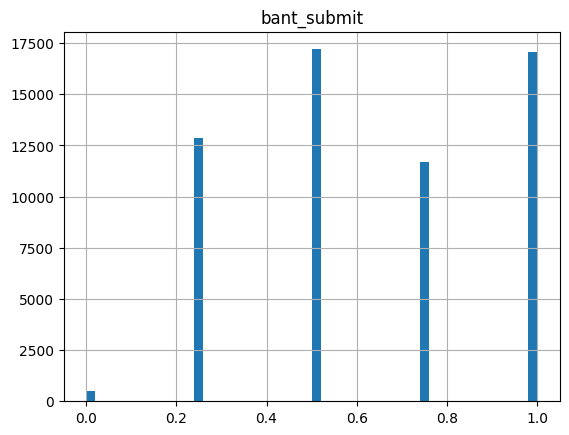

In [ ]:
train_df[["bant_submit"]].hist(bins=50)
plt.show()

### customer_country

In [ ]:
train_df[["customer_country"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59299 entries, 0 to 59298
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customer_country  58317 non-null  object
dtypes: object(1)
memory usage: 463.4+ KB


In [ ]:
train_df[["customer_country"]].value_counts()

customer_country      
//India                   3037
/São Paulo/Brazil         1344
//United States            962
//United Kingdom           805
//Saudi Arabia             718
                          ... 
/Mumvai/India                1
/Muncie /United States       1
/Mundo Novo- MS/Brazil       1
/Mundra-kutch/India          1
新骏环路  /上海/                   1
Length: 15399, dtype: int64

### business_unit

In [ ]:
train_df[['business_unit']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59299 entries, 0 to 59298
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   business_unit  59299 non-null  object
dtypes: object(1)
memory usage: 463.4+ KB


In [ ]:
train_df[['business_unit']].value_counts()

business_unit
ID               25563
AS               24774
IT                8664
Solution           296
CM                   2
dtype: int64

<Axes: >

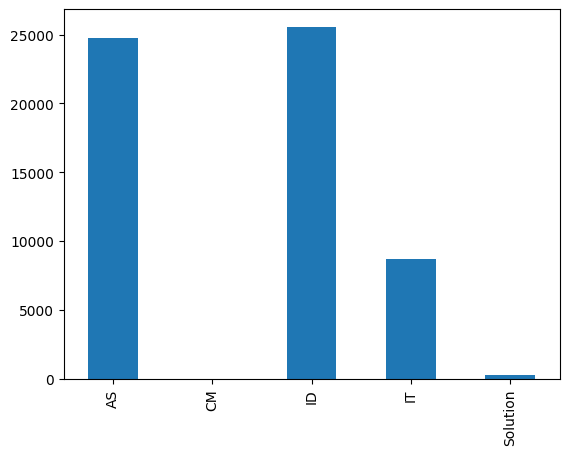

In [ ]:
train_df['business_unit'].value_counts().sort_index().plot.bar()

### com_reg_ver_win_rate

In [ ]:
train_df[["com_reg_ver_win_rate"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59299 entries, 0 to 59298
Data columns (total 1 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   com_reg_ver_win_rate  14568 non-null  float64
dtypes: float64(1)
memory usage: 463.4 KB


In [ ]:
train_df[["com_reg_ver_win_rate"]].value_counts()

com_reg_ver_win_rate
0.074949                1130
0.003937                 803
0.073248                 791
0.642857                 782
0.003788                 713
                        ... 
0.125000                  13
0.444444                  12
0.400000                  12
1.000000                  10
0.200000                   5
Length: 80, dtype: int64

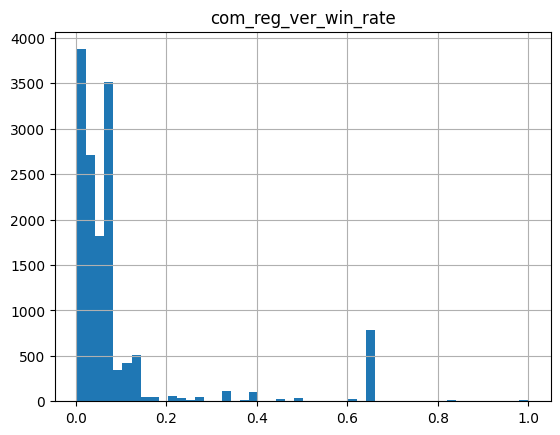

In [ ]:
train_df[["com_reg_ver_win_rate"]].hist(bins=50)
plt.show()

### customer_idx

In [ ]:
train_df[["customer_idx"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59299 entries, 0 to 59298
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   customer_idx  59299 non-null  int64
dtypes: int64(1)
memory usage: 463.4 KB


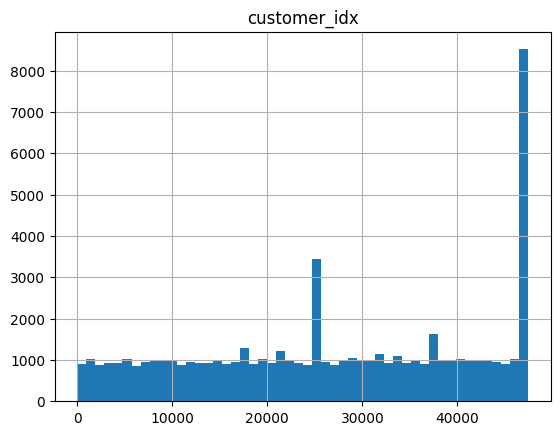

In [ ]:
train_df[["customer_idx"]].hist(bins=50)
plt.show()

In [ ]:
train_df[["customer_idx"]].value_counts()

customer_idx
47466           7686
25096           2421
37680            367
18030            331
21321            162
                ... 
18092              1
18091              1
18088              1
18087              1
23877              1
Length: 35112, dtype: int64

### customer_type

In [ ]:
train_df[['customer_type']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59299 entries, 0 to 59298
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customer_type  15338 non-null  object
dtypes: object(1)
memory usage: 463.4+ KB


In [ ]:
len(train_df[['customer_type']].value_counts())

33

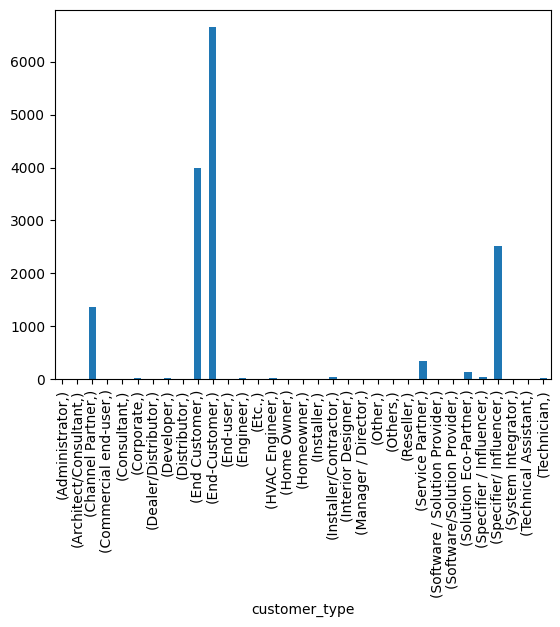

In [ ]:
train_df[['customer_type']].value_counts().sort_index().plot.bar()
plt.show()

### enterprise

In [ ]:
train_df[['enterprise']].value_counts()

enterprise
Enterprise    37783
SMB           21516
dtype: int64

### historical_existing_cnt

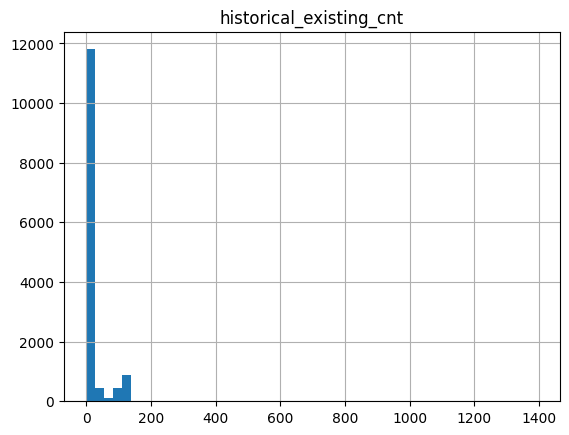

In [ ]:
train_df[['historical_existing_cnt']].hist(bins=50)
plt.show()

In [ ]:
train_df[['historical_existing_cnt']].value_counts()

historical_existing_cnt
4.0                        2957
0.0                        1973
1.0                        1967
19.0                       1441
16.0                       1132
                           ... 
145.0                         1
108.0                         1
138.0                         1
136.0                         1
1394.0                        1
Length: 136, dtype: int64

### id_strategic_ver

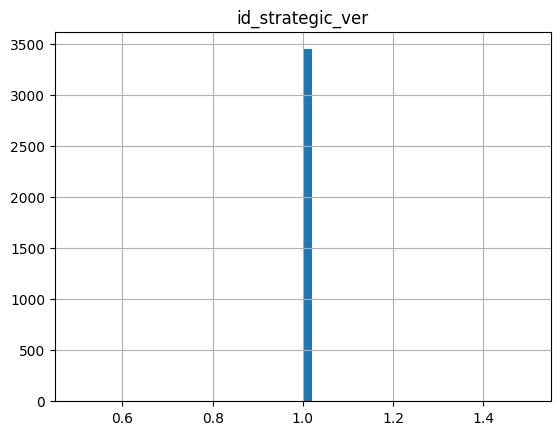

In [ ]:
train_df[['id_strategic_ver']].hist(bins=50)
plt.show()

In [ ]:
train_df[['id_strategic_ver']].value_counts()

id_strategic_ver
1.0                 3444
dtype: int64

### it_strategic_ver

In [ ]:
train_df[['it_strategic_ver']].value_counts()

it_strategic_ver
1.0                 1121
dtype: int64

### idit_strategic_ver (생략)

### customer_job

In [ ]:
train_df[['customer_job']].value_counts()

customer_job        
engineering             6342
other                   4852
administrative          3359
education               2287
sales                   2218
                        ... 
appliance specialist       1
head of technology         1
head                       1
hardware selection         1
manufacturer               1
Length: 560, dtype: int64

In [ ]:
train_df[['customer_job']].value_counts().iloc[:10]

customer_job          
engineering               6342
other                     4852
administrative            3359
education                 2287
sales                     2218
operations                1961
purchasing                1938
information technology    1937
business development      1801
consulting                1349
dtype: int64

### lead_desc_length

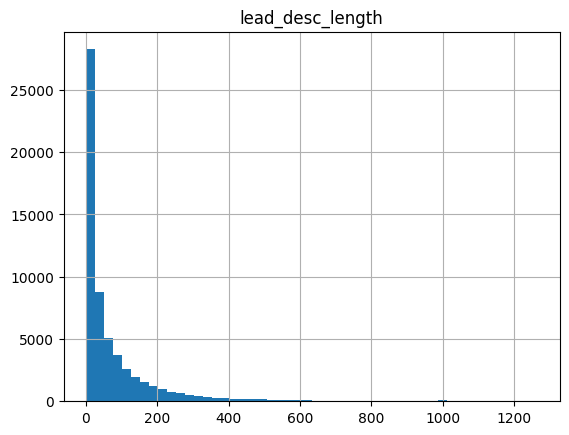

In [ ]:
train_df[['lead_desc_length']].hist(bins=50)
plt.show()

In [ ]:
train_df[['lead_desc_length']].value_counts()

lead_desc_length
3                   10378
14                   3180
2                     934
10                    891
4                     884
                    ...  
809                     1
810                     1
821                     1
823                     1
1264                    1
Length: 909, dtype: int64

### inquiry_type

In [ ]:
train_df[['inquiry_type']].value_counts()

inquiry_type                                                                                      
Quotation or purchase consultation                                                                    23274
Quotation or Purchase Consultation                                                                    18766
Sales Inquiry                                                                                          9977
Product Information                                                                                    1237
Other                                                                                                   929
                                                                                                      ...  
Pantallas Interactivas para Clinicas                                                                      1
Preciso de um monitor médico para radiografia convencional e tomogrtafia.                                 1
AIO                                  

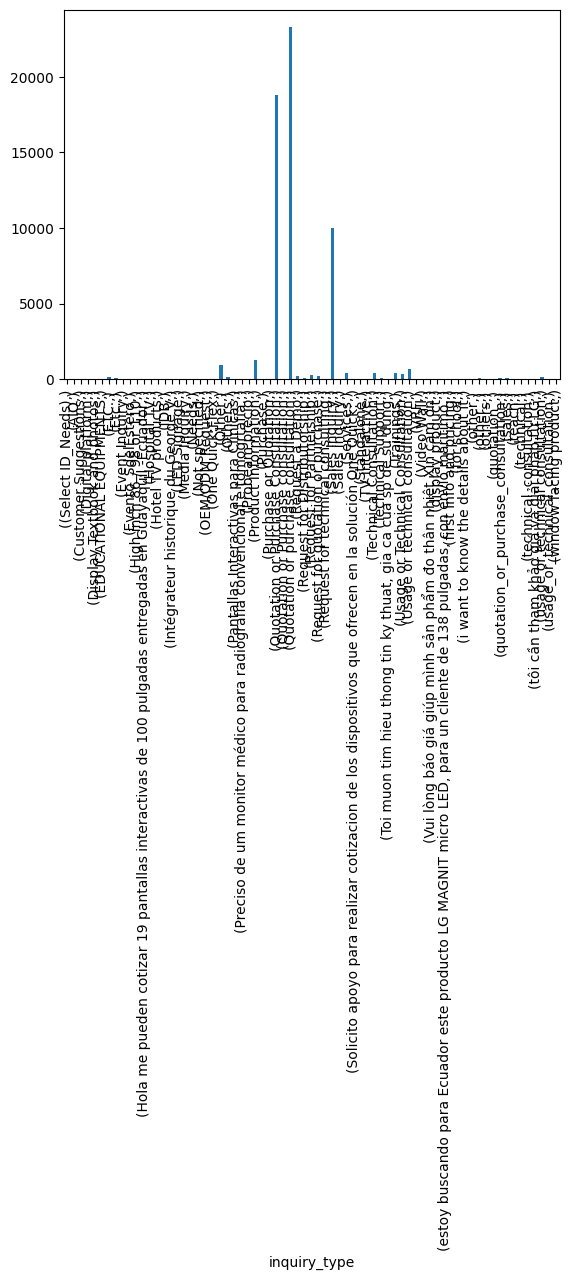

In [ ]:
train_df[['inquiry_type']].value_counts().sort_index().plot.bar()
plt.show()

### product_category

In [ ]:
train_df[['product_category']].value_counts()

product_category                                                                                    
interactive digital board                                                                               6154
vrf                                                                                                     5640
multi-split                                                                                             3674
video wall signage                                                                                      2029
etc.                                                                                                    2018
                                                                                                        ... 
monitor signage,monior/monitor tv,vacuum cleaner,tv,home beauty,commercial tv,pc,refrigerator,styler       1
monitor signage,solar                                                                                      1
monitor signage,solar,monio

### product_subcategory

In [ ]:
train_df[['product_subcategory']].value_counts()

product_subcategory      
All Medical Displays         446
Interactive Digital Board    417
TR3BF Series                 374
Transparent OLED Signage     288
Diagnostic Monitors          284
                            ... 
Pro:CentrC tv                  1
Pro:Centric                    1
Pro:Centric TV                 1
QHD Monitors                   1
Pixel Pitch P10 3x2            1
Length: 330, dtype: int64

### product_modelname

In [ ]:
train_df[['product_modelname']].value_counts()

product_modelname      
UltraFine Ergo(32UN880)    523
28MQ780                    479
All Medical Displays       350
43HT3WJ                    290
55CT5WJ                    261
                          ... 
BU60                         1
CL600                        1
CST 4 Vias                   1
50US660H                     1
55UT662M (MEA)               1
Length: 665, dtype: int64

### custom_country.1

In [ ]:
train_df[['customer_country.1']].value_counts()

customer_country.1    
//India                   3037
/São Paulo/Brazil         1344
//United States            962
//United Kingdom           805
//Saudi Arabia             718
                          ... 
/Mumvai/India                1
/Muncie /United States       1
/Mundo Novo- MS/Brazil       1
/Mundra-kutch/India          1
新骏环路  /上海/                   1
Length: 15399, dtype: int64

### customer_position

In [ ]:
train_df[['customer_position']].value_counts()

customer_position            
none                             19680
manager                           8217
ceo/founder                       7984
other                             6499
director                          4843
                                 ...  
maths lecturer                       1
mindenes                             1
neet/ olympiad expert faculty        1
pathologist                          1
vp                                   1
Length: 117, dtype: int64

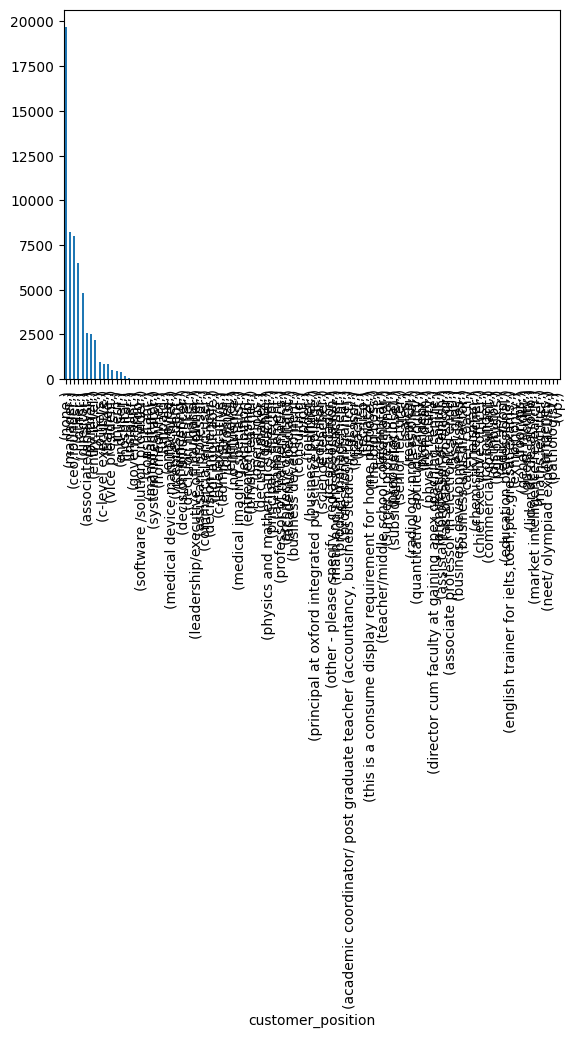

In [ ]:
train_df[['customer_position']].value_counts().plot.bar()
plt.show()

### response_corporate

In [ ]:
len(train_df[['response_corporate']].value_counts())

53

In [ ]:
train_df[['response_corporate']].value_counts()

response_corporate
LGEIL                 16908
LGESP                  9311
LGEUS                  5955
LGEMS                  2768
LGEPH                  2651
LGEGF                  2149
LGECB                  2079
LGEUK                  1651
LGESJ                  1469
LGECL                  1339
LGEPS                  1252
LGEIS                  1146
LGEPR                  1131
LGEDG                  1051
LGEPL                   850
LGEEG                   704
LGEVH                   614
LGEES                   592
LGETK                   541
LGEAR                   491
LGEKR                   433
LGEHK                   383
LGEAP                   366
LGESL                   348
LGEMK                   331
LGEFS                   302
LGEAF                   288
LGEIN                   281
LGELF                   274
LGESA                   268
LGECI                   263
LGETH                   185
LGEEF                   159
LGEPT                   111
LGEML                   110
L

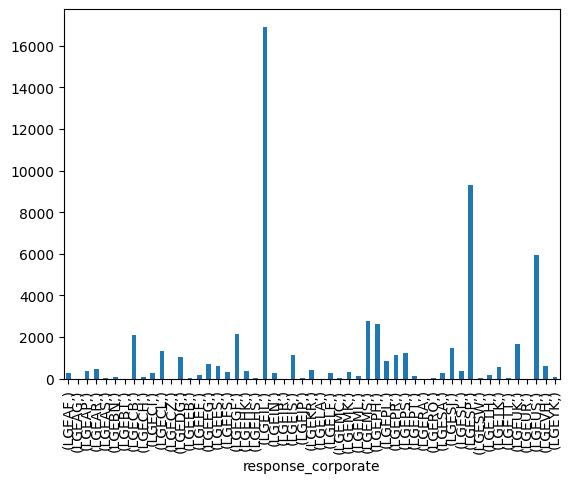

In [ ]:
train_df[['response_corporate']].value_counts().sort_index().plot.bar()
plt.show()

### expected_timeline

In [ ]:
train_df[['expected_timeline']].value_counts()

expected_timeline                                                                                                             
less than 3 months                                                                                                                17250
3 months ~ 6 months                                                                                                                5026
more than a year                                                                                                                   3023
9 months ~ 1 year                                                                                                                  1101
6 months ~ 9 months                                                                                                                1098
                                                                                                                                  ...  
discussed with client,details mailed for idb and one quic

### business_area

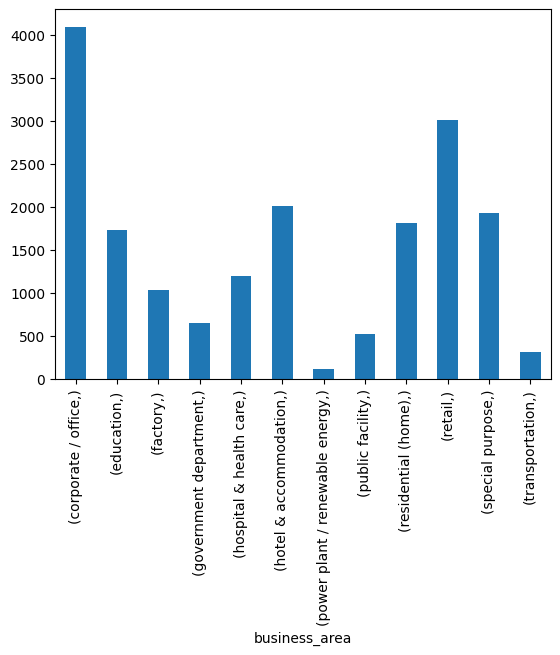

In [ ]:
train_df[['business_area']].value_counts().sort_index().plot.bar()
plt.show()

### business_subarea

In [ ]:
train_df[['business_subarea']].value_counts()

business_subarea             
Others                           1740
Other Stores                      280
Hospital                          267
Manufacturing Factory / Plant     196
Construction                      191
                                 ... 
Officetel                           2
Dormitory                           1
Holdings                            1
Casino Resort                       1
Travel Agency                       1
Length: 86, dtype: int64

### lead_owner

In [ ]:
train_df[['lead_owner']].value_counts()

lead_owner
174           4627
175           4120
97            2499
23            2453
194           2208
              ... 
701              1
399              1
902              1
91               1
898              1
Length: 984, dtype: int64

## 3. feature 간 상관관계 파악

### 수치형 특성 간의 상관계수

In [ ]:
corr_matrix = train_df.corr(numeric_only=True)

In [ ]:
corr_matrix['is_converted'].sort_values(ascending=False)

is_converted               1.000000
com_reg_ver_win_rate       0.342590
lead_desc_length           0.112822
ver_win_ratio_per_bu       0.109572
lead_owner                 0.098862
ver_cus                    0.063554
ver_pro                    0.008846
bant_submit               -0.002480
historical_existing_cnt   -0.004490
ver_win_rate_x            -0.048552
customer_idx              -0.056425
id_strategic_ver                NaN
it_strategic_ver                NaN
idit_strategic_ver              NaN
Name: is_converted, dtype: float64

In [ ]:
corr_matrix['bant_submit'].sort_values(ascending=False)

bant_submit                1.000000
ver_pro                    0.131256
lead_desc_length           0.117897
ver_cus                    0.100217
ver_win_rate_x             0.091302
is_converted              -0.002480
ver_win_ratio_per_bu      -0.059189
customer_idx              -0.103236
lead_owner                -0.136132
historical_existing_cnt   -0.201929
com_reg_ver_win_rate      -0.358328
id_strategic_ver                NaN
it_strategic_ver                NaN
idit_strategic_ver              NaN
Name: bant_submit, dtype: float64

In [ ]:
train_df[['is_converted']].value_counts()

is_converted
False           54449
True             4850
dtype: int64

In [ ]:
train_df_1 = train_df[train_df['is_converted'] == 1]
train_df_0 = train_df[train_df['is_converted'] == 0]

In [ ]:
train_df_1[['bant_submit']].value_counts().sort_index()

bant_submit
0.00             82
0.25           1272
0.50            937
0.75           1117
1.00           1442
dtype: int64

In [ ]:
train_df_0[['bant_submit']].value_counts().sort_index()

bant_submit
0.00             431
0.25           11580
0.50           16255
0.75           10564
1.00           15619
dtype: int64

array([[<Axes: title={'center': 'bant_submit'}>]], dtype=object)

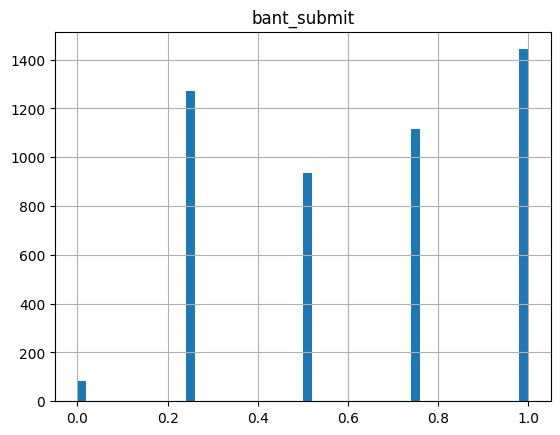

In [ ]:
train_df_1[['bant_submit']].hist(bins=50)

array([[<Axes: title={'center': 'bant_submit'}>]], dtype=object)

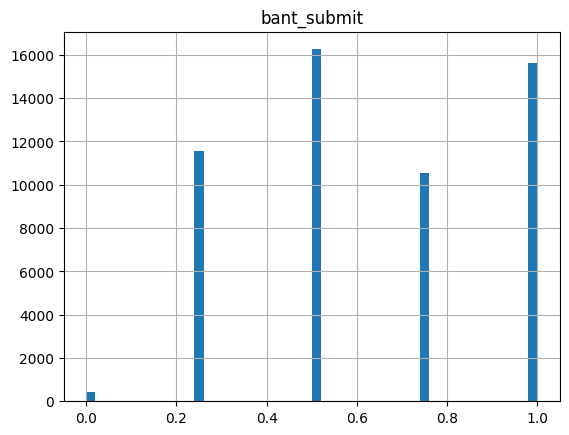

In [ ]:
train_df_0[['bant_submit']].hist(bins=50)

### bant_submit과 is_converted의 관계
- 주어진 train set에 False가 너무 많아서 제대로된 관계파악이 어려움
- 그리고 주어진 값으로도 의미있는 추이가 없음

In [ ]:
train_df_1 = train_df[train_df['bant_submit'] == 1]
train_df_0_75 = train_df[train_df['bant_submit'] == 0.75]
train_df_0_5 = train_df[train_df['bant_submit'] == 0.5]
train_df_0_25 = train_df[train_df['bant_submit'] == 0.25]
train_df_0 = train_df[train_df['bant_submit'] == 0]

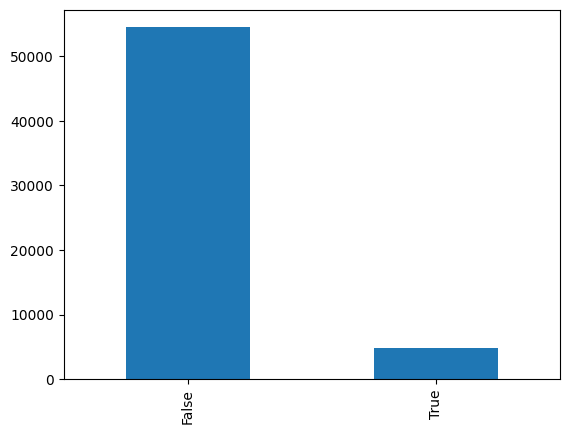

In [ ]:
train_df['is_converted'].value_counts().sort_index().plot.bar()
plt.show()

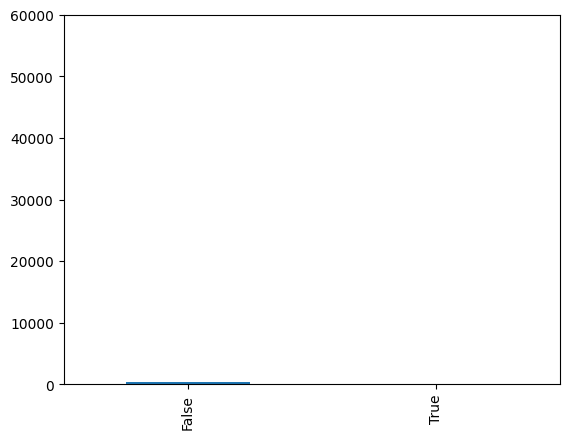

In [ ]:
plt.ylim(0, 60000)
train_df_0['is_converted'].value_counts().sort_index().plot.bar()
plt.show()

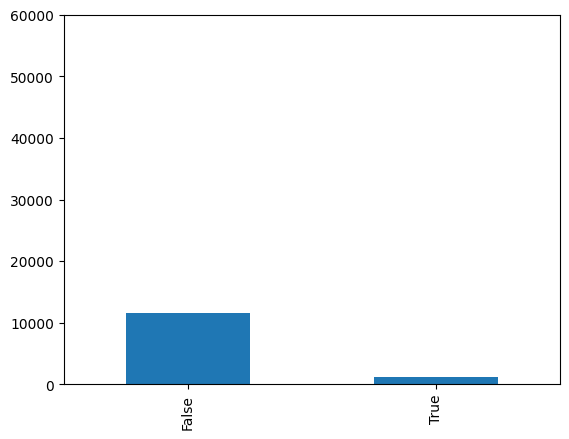

In [ ]:
plt.ylim(0, 60000)
train_df_0_25['is_converted'].value_counts().sort_index().plot.bar()
plt.show()

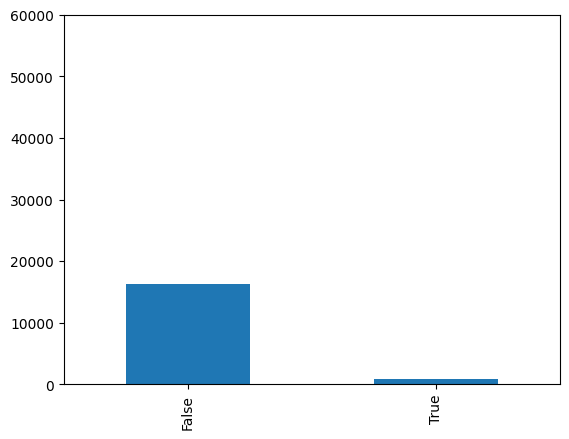

In [ ]:
plt.ylim(0, 60000)
train_df_0_5['is_converted'].value_counts().sort_index().plot.bar()
plt.show()

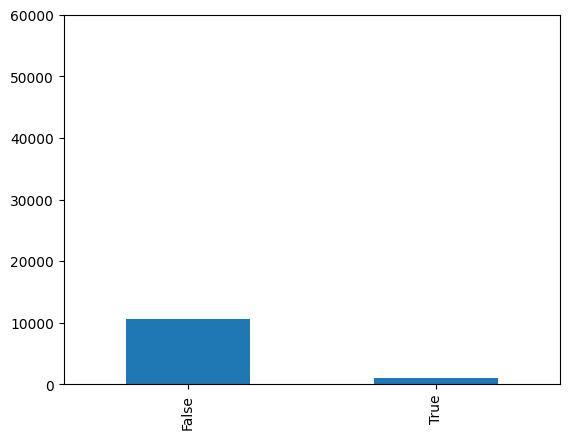

In [ ]:
plt.ylim(0, 60000)
train_df_0_75['is_converted'].value_counts().sort_index().plot.bar()
plt.show()

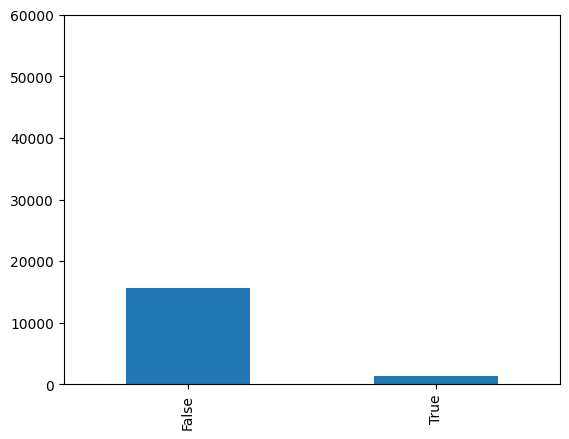

In [ ]:
plt.ylim(0, 60000)
train_df_1['is_converted'].value_counts().sort_index().plot.bar()
plt.show()

### historical_existing_cnt와 is_converted 사이의 관계
- regression에 사용할 정도의 상관관계는 없음



In [ ]:
train_df_false = train_df[train_df['is_converted'] == 0].fillna(0)
train_df_true = train_df[train_df['is_converted'] == 1].fillna(0)

array([[<Axes: title={'center': 'historical_existing_cnt'}>]],
      dtype=object)

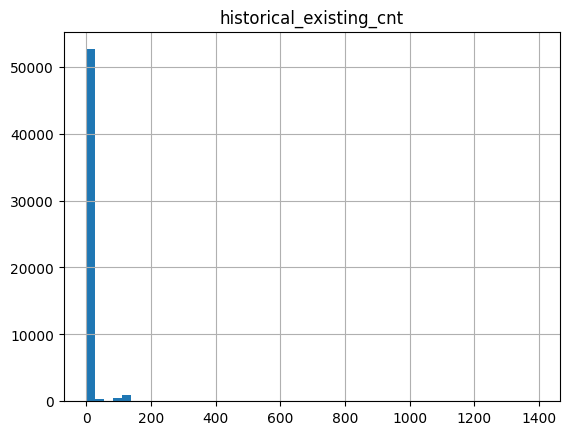

In [ ]:
train_df_false[['historical_existing_cnt']].hist(bins=50)

array([[<Axes: title={'center': 'historical_existing_cnt'}>]],
      dtype=object)

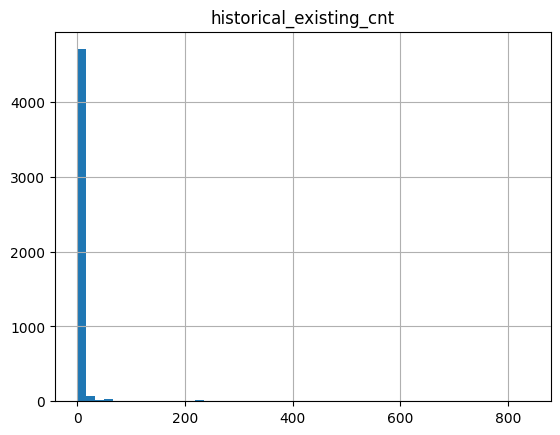

In [ ]:
train_df_true[['historical_existing_cnt']].hist(bins=50)

In [ ]:
train_df_false_nonzero = train_df_false[train_df_false['historical_existing_cnt'] > 0]
train_df_true_nonzero = train_df_true[train_df_true['historical_existing_cnt'] > 0]

array([[<Axes: title={'center': 'historical_existing_cnt'}>]],
      dtype=object)

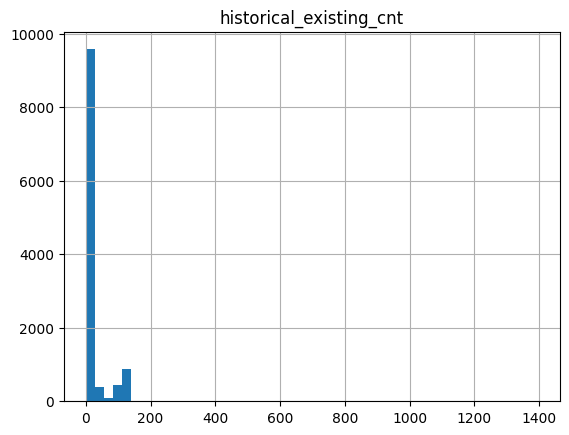

In [ ]:
train_df_false_nonzero[['historical_existing_cnt']].hist(bins=50)

array([[<Axes: title={'center': 'historical_existing_cnt'}>]],
      dtype=object)

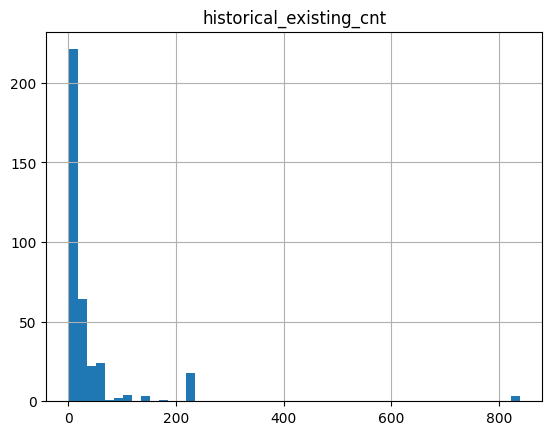

In [ ]:
train_df_true_nonzero[['historical_existing_cnt']].hist(bins=50)

### customer_country와 is_converted의 상관관계

In [ ]:
train_df_cc_ic = train_df[["customer_country", "is_converted"]].fillna('//India')
train_df_cc_ic['is_converted'] = train_df_cc_ic['is_converted'].apply(lambda x: int(x))

In [ ]:
train_df_cc_ic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59299 entries, 0 to 59298
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customer_country  59299 non-null  object
 1   is_converted      59299 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 926.7+ KB


<ipython-input-50-1de5a8a6d3ee>:6: UserWarning: Glyph 9 (	) missing from current font.
  plt.savefig(f'{range[0], range[1]}')
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


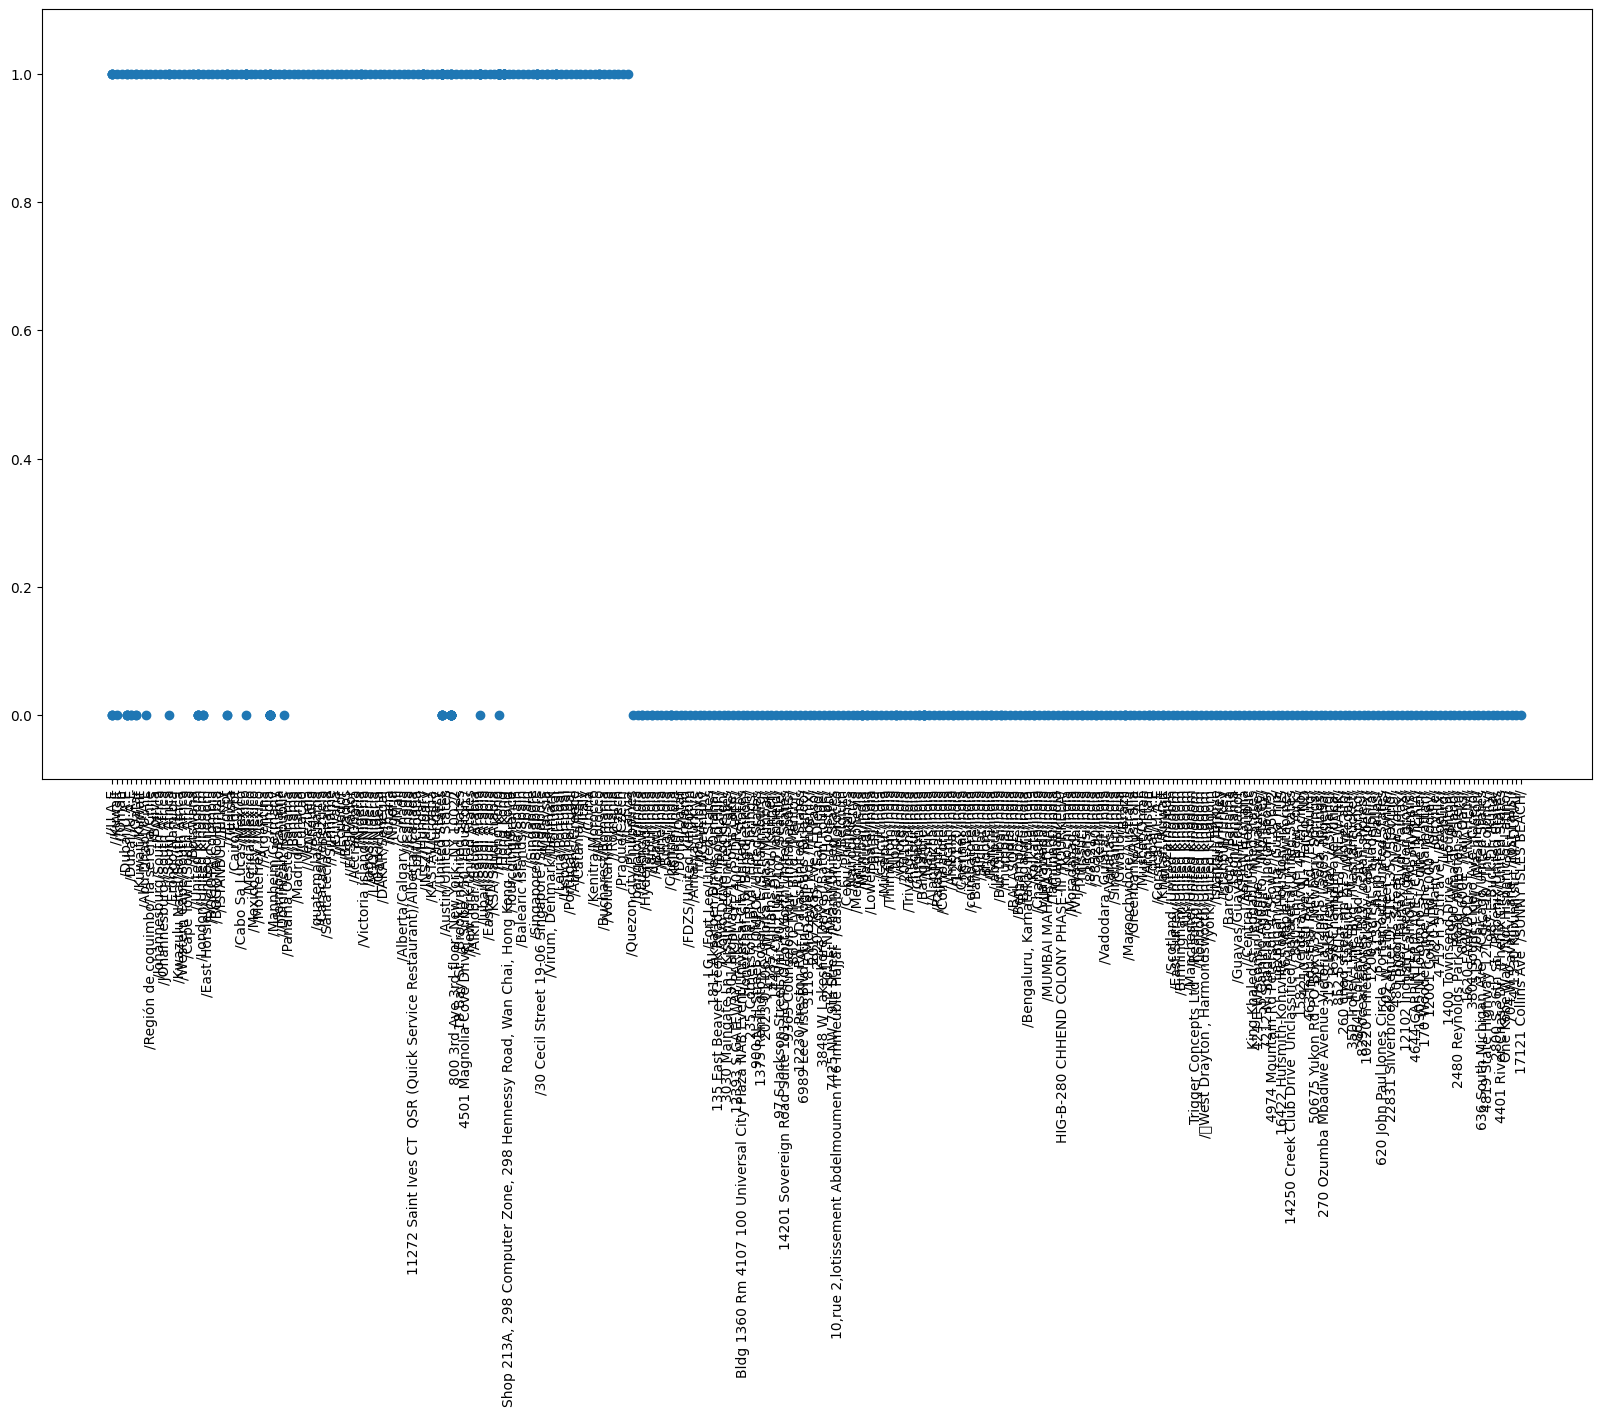

In [ ]:
range = (2500, 3000)
plt.figure(figsize=(20, 10))
plt.ylim(-0.1, 1.1)
plt.scatter(train_df_cc_ic["customer_country"][range[0]: range[1]], train_df_cc_ic["is_converted"][range[0]: range[1]])
plt.xticks(rotation=90)
plt.savefig(f'{range[0], range[1]}')
plt.show()

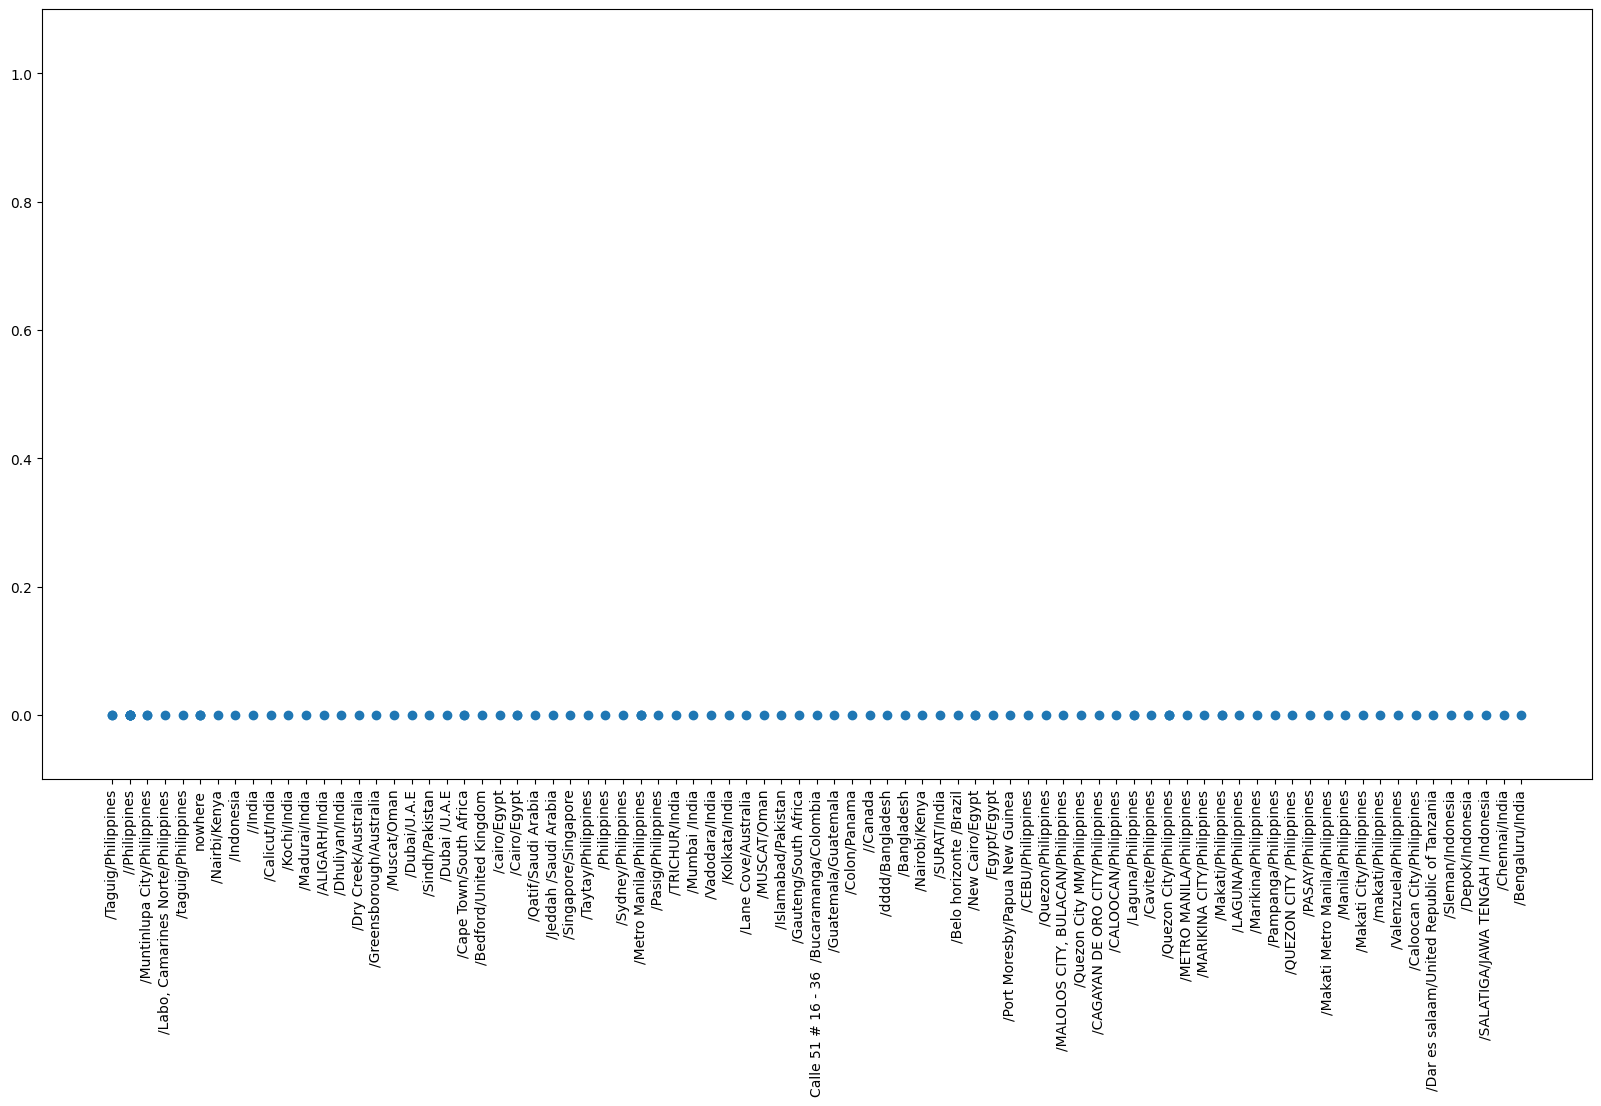

In [ ]:
plt.figure(figsize=(20, 10))
plt.ylim(-0.1, 1.1)
plt.scatter(train_df_cc_ic["customer_country"][100:200], train_df_cc_ic["is_converted"][100:200])
plt.xticks(rotation=90)
plt.show()

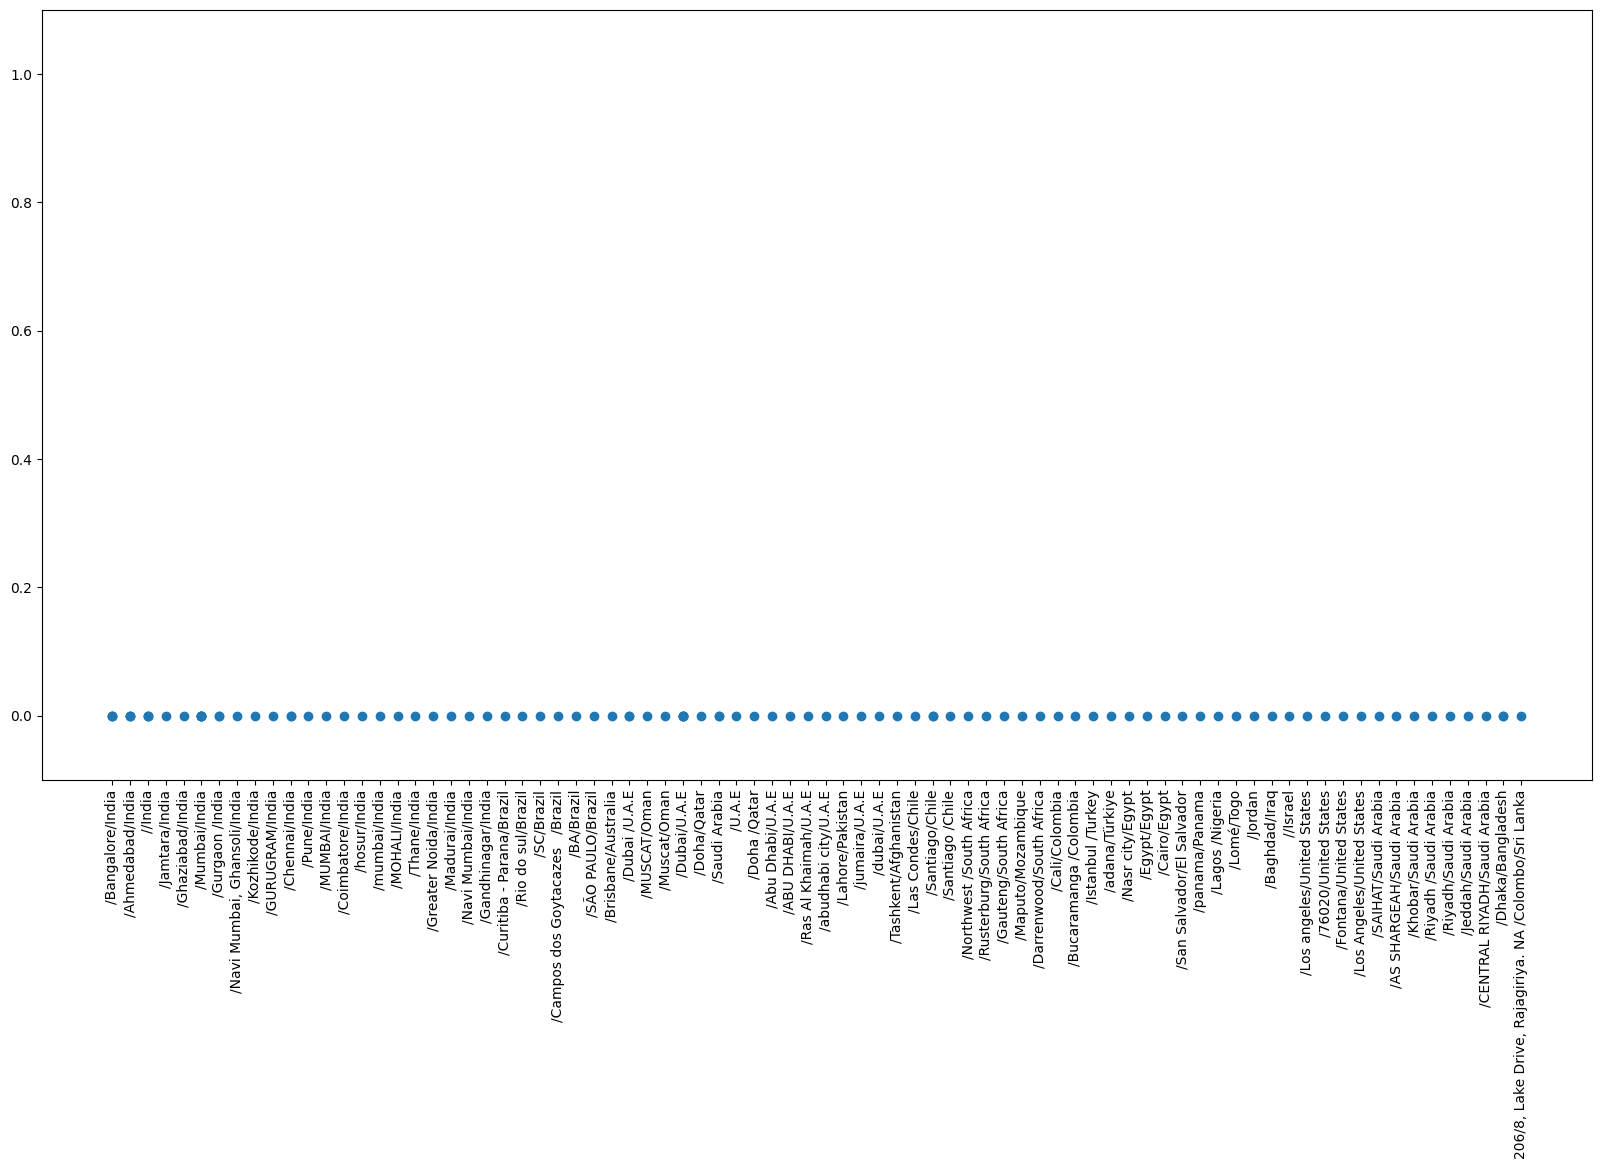

In [ ]:
plt.figure(figsize=(20, 10))
plt.ylim(-0.1, 1.1)
plt.scatter(train_df_cc_ic["customer_country"][200:300], train_df_cc_ic["is_converted"][200:300])
plt.xticks(rotation=90)
plt.show()

In [ ]:
def label_encoding(series: pd.Series) -> pd.Series:
    """범주형 데이터를 시리즈 형태로 받아 숫자형 데이터로 변환합니다."""

    my_dict = {}

    # 모든 요소를 문자열로 변환
    series = series.astype(str)

    for idx, value in enumerate(sorted(series.unique())):
        my_dict[value] = idx
    series = series.map(my_dict)

    return series

In [ ]:
train_df_cc_ic_sorted = train_df_cc_ic.sort_values(by='is_converted')

In [ ]:
train_df_cc_ic_sorted.head(n=20)

,customer_country,is_converted
29649,//Brazil,0
39336,/São Paulo/Brazil,0
39337,/Dois Irmãos/Brazil,0
39338,/Uniao da vitoria/Brazil,0
39339,/Sao paulo/Brazil,0
39340,/São Paulo/Brazil,0
39341,/Americana/Brazil,0
39342,/Americana/Brazil,0
39343,/Americana/Brazil,0
39344,/São Paulo/Brazil,0


In [ ]:
train_df_cc_ic_sorted['customer_country'] = label_encoding(train_df_cc_ic_sorted['customer_country'])

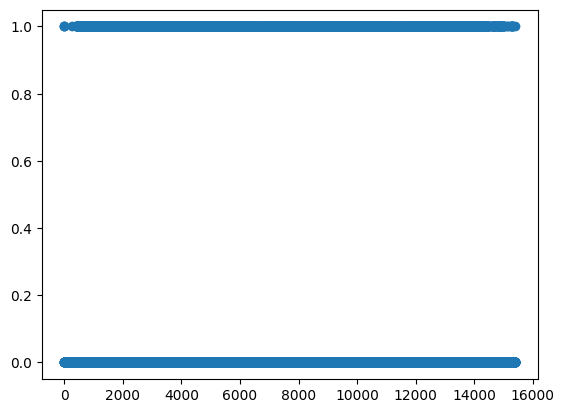

In [ ]:
plt.scatter(train_df_cc_ic_sorted['customer_country'], train_df_cc_ic_sorted['is_converted'])
plt.show()

### business_unit과 is_converted

In [ ]:
train_df_ID = train_df[train_df['business_unit'] == 'ID']
train_df_AS = train_df[train_df['business_unit'] == 'AS']
train_df_IT = train_df[train_df['business_unit'] == 'IT']
train_df_SOL = train_df[train_df['business_unit'] == 'Solution']
train_df_CM = train_df[train_df['business_unit'] == 'CM']

In [ ]:
train_df_ID['is_converted'].value_counts()

False    22943
True      2620
Name: is_converted, dtype: int64

In [ ]:
train_df_AS['is_converted'].value_counts()

False    23391
True      1383
Name: is_converted, dtype: int64

In [ ]:
train_df_IT['is_converted'].value_counts()

False    7820
True      844
Name: is_converted, dtype: int64

In [ ]:
train_df_SOL['is_converted'].value_counts()

False    293
True       3
Name: is_converted, dtype: int64

In [ ]:
train_df_CM['is_converted'].value_counts()

False    2
Name: is_converted, dtype: int64

### customer_type과 is_converted

### enterprise와 is_converted

In [ ]:
train_df_Enterprise = train_df[train_df['enterprise'] == 'Enterprise']
train_df_SMB = train_df[train_df['enterprise'] == 'SMB']

In [ ]:
train_df_Enterprise['is_converted'].value_counts()

False    35669
True      2114
Name: is_converted, dtype: int64

In [ ]:
train_df_Enterprise['business_unit'].value_counts()

AS          17667
ID          15174
IT           4802
Solution      138
CM              2
Name: business_unit, dtype: int64

In [ ]:
train_df_SMB['business_unit'].value_counts()

ID          10389
AS           7107
IT           3862
Solution      158
Name: business_unit, dtype: int64

In [ ]:
train_df_SMB['is_converted'].value_counts()

False    18780
True      2736
Name: is_converted, dtype: int64

### id_strategic_ver
ID 리드에 대해서만 1이 부여되는 듯함

In [ ]:
train_df_id_strat = train_df[train_df['id_strategic_ver'] == 1]

In [ ]:
train_df_id_strat['business_unit'].value_counts()

ID    3444
Name: business_unit, dtype: int64

In [ ]:
train_df_id_strat['business_area'].value_counts()

corporate / office       2460
hotel & accommodation     984
Name: business_area, dtype: int64

### it_strategic_ver

In [ ]:
train_df_it_strat = train_df[train_df['it_strategic_ver'] == 1]

In [ ]:
train_df_it_strat['business_unit'].value_counts()

IT    1121
Name: business_unit, dtype: int64

In [ ]:
train_df_it_strat['business_area'].value_counts()

hotel & accommodation    791
corporate / office       330
Name: business_area, dtype: int64

### idit_strategic_ver

In [ ]:
train_df_idit_strat = train_df[train_df['idit_strategic_ver'] == 1]

In [ ]:
train_df_idit_strat['business_unit'].value_counts()

ID    3444
IT    1121
Name: business_unit, dtype: int64

In [ ]:
train_df_idit_strat['business_area'].value_counts()

corporate / office       2790
hotel & accommodation    1775
Name: business_area, dtype: int64

### AS 사업부의 담당 서비스를 요청하는 고객은 누굴까

In [ ]:
train_df_AS = train_df[train_df['business_unit'] == 'AS']

In [ ]:
train_df_AS['business_area'].value_counts()

residential (home)                1365
corporate / office                1278
retail                             788
special purpose                    713
factory                            403
education                          210
hotel & accommodation              207
public facility                    200
government department              173
hospital & health care             156
power plant / renewable energy      62
transportation                      53
Name: business_area, dtype: int64

# MODEL SELECTION

## FEATURE ENGINEERING

### 결측치 처리하기
- baseline에서 사용한 방법: 결측치 모두 0으로 채우기


**결측비율이 test set에서도 거의 동일할 것이라고 가정함**

- Approach 1. 전부 -1로 채우기
  - DecisionTree 사용하는 알고리즘에서는 효과X (f1-score가 0.49대로 전혀 향상되지 않음)
- Approach 2
  - 결측비율 threshold를 정해서 feature 마다 결측 비율이 역치 이하이면 imputing, 초과면 0으로 채우기
  - 결측비율이 너무 높으면 그냥 drop하기
  - imputer: KNNImputer, IterativeImputer
- Approach 3
  - 결측비율 신경쓰지 않고 imputer 적용하기

### Categorical Encoding
- baseline에서 사용한 방법: LabelEncoder 방식
- Approach 1. OneHotEncoding
- Approach 2.

### 스케일링 및 그 외
- 동일한 값만 있는 특성 제거하기
  - 위험성: test set에서는 그렇지 않을 수도 있음
- multimodal인 거 찾아서 rbf_kernel 적용해보기
- skewed인 거 찾아서 log_transformation 적용하기
- inquiry_type, customer_type 합치기

## Approach 1
- 결측치 모두 0으로 채우기 (-1로 채워도 성능은 비슷)
- StandardScaler, OneHotEncoder 사용
- Logistic Regression

### 결과
- validation test f1 score: 0.291
- cross validation f1 score: 0.131

In [ ]:
# 필수 라이브러리
import pandas as pd
import numpy as np
from sklearn.metrics import (
    make_scorer,
    accuracy_score,
    confusion_matrix,
    f1_score,
    precision_score,
    recall_score
)
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import SGDClassifier  # for logistic regression
from sklearn.preprocessing import FunctionTransformer, StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline, Pipeline

# 데이터셋 읽어오기
base_path = '/content/drive/MyDrive/LG-Aimers/phase2'
train_df = pd.read_csv(f'{base_path}/train.csv')
test_df = pd.read_csv(f'{base_path}/submission.csv')


X_train, X_val, y_train, y_val = train_test_split(
    train_df, train_df['is_converted'], test_size=0.2,
    shuffle=True, random_state=42,
    stratify=train_df['is_converted']
)

# 모든 결측치를 0으로 채우기
cat_pipeline = make_pipeline(
    SimpleImputer(strategy='constant', fill_value='0'),
    OneHotEncoder(handle_unknown='ignore'),
    # label encoding
    # FunctionTransformer(label_encoding, feature_names_out='one-to-one')
)

num_pipeline = make_pipeline(
    SimpleImputer(strategy='constant', fill_value=-1),
    StandardScaler()
)

num_columns = [
    'bant_submit',
    'com_reg_ver_win_rate',
    'customer_idx',
    'historical_existing_cnt',
    'id_strategic_ver',
    'it_strategic_ver',
    'idit_strategic_ver',
    'lead_desc_length',
    'ver_cus',
    'ver_pro',
    'ver_win_rate_x',
    'ver_win_ratio_per_bu',
    'lead_owner',
]

cat_columns = [
    "customer_country",
    "business_subarea",
    "business_area",
    "business_unit",
    "customer_type",
    "enterprise",
    "customer_job",
    "inquiry_type",
    "product_category",
    "product_subcategory",
    "product_modelname",
    "customer_country.1",
    "customer_position",
    "response_corporate",
    "expected_timeline",
]

# is_converted, id(test set only)를 드랍하는 전처리 파이프라인
preprocessing = ColumnTransformer([
    ("num_pipeline", num_pipeline, num_columns),
    ("cat_pipeline", cat_pipeline, cat_columns)
], remainder='drop')

sgd_clf_log_reg = Pipeline([
    ("preprocessing", preprocessing),
    ("logistic_regression", SGDClassifier(loss='log_loss',
                                          penalty='l2', alpha=0.0001,
                                          random_state=42))
])

sgd_clf_log_reg.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num_pipeline',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value=-1,
                                                                                 strategy='constant')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['bant_submit',
                                                   'com_reg_ver_win_rate',
                                                   'customer_idx',
                                                   'historical_existing_cnt',
                                                   'id_strategic_ver',
                                                   'it_strategic_ver',
                                                   'idit_strategic_ver',
                                                   'lead_desc...
                                                  ['customer_country',
                                                   'business_subarea',
                                                   'business_area',
                                                   'business_unit',
                                                   'customer_type',
                                                   'enterprise', 'customer_job',
                                                   'inquiry_type',
                                                   'product_category',
                                                   'product_subcategory',
                                                   'product_modelname',
                                                   'customer_country.1',
                                                   'customer_position',
                                                   'response_corporate',
                                                   'expected_timeline'])])),
                ('logistic_regression',
                 SGDClassifier(loss='log_loss', random_state=42))])

In [ ]:
cross_val_score(sgd_clf_log_reg, train_df, train_df['is_converted'],
                cv=5, scoring=make_scorer(f1_score)).mean().round(3)

0.142

In [ ]:
y_pred = sgd_clf_log_reg.predict(X_val)
f1_score(y_pred, y_val)

0.29550647372429556

## Approach 2
- 결측치
  - 모두 0으로 채우기
  - KNNImputer 이용하기
- SVM 이용하기

### 결과(hyperparameter tuning 전)
- validation set: 0.5028571428571428 -> 0.5475(KNN)
- cross validation set: 0.213
  - stratify 되지 않아서 일 수 있음

- public score: 0.06

### 결과(hyperparameter tuning 이후)
1. hyperparameter 종류
- C(regularization param): 1 전후
- kernel: poly, rbf
- degree: 3 ~
  - kernel=poly 일때만

In [ ]:
# 필수 라이브러리
import pandas as pd
import numpy as np
from sklearn.metrics import (
    make_scorer,
    accuracy_score,
    confusion_matrix,
    f1_score,
    precision_score,
    recall_score
)
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.preprocessing import FunctionTransformer, StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline, Pipeline

# 데이터셋 읽어오기
base_path = '/content/drive/MyDrive/LG-Aimers/phase2'
train_df = pd.read_csv(f'{base_path}/train.csv')
test_df = pd.read_csv(f'{base_path}/submission.csv')

X_train, X_val, y_train, y_val = train_test_split(
    train_df, train_df['is_converted'], test_size=0.2,
    shuffle=True, random_state=42,
    stratify=train_df['is_converted']
)

# 모든 결측치를 0으로 채우기

cat_pipeline = Pipeline([
    ("simple_imputer", SimpleImputer(strategy='constant')),
    ("one_hot_encoder", OneHotEncoder(handle_unknown='ignore'))
])

num_pipeline = Pipeline([
    ("knn_imputer", KNNImputer(n_neighbors=5)),
    ("std_scaler", StandardScaler())
])

num_columns = [
    'bant_submit',
    'com_reg_ver_win_rate',
    'customer_idx',
    'historical_existing_cnt',
    'id_strategic_ver',
    'it_strategic_ver',
    'idit_strategic_ver',
    'lead_desc_length',
    'ver_cus',
    'ver_pro',
    'ver_win_rate_x',
    'ver_win_ratio_per_bu',
    'lead_owner',
]

cat_columns = [
    "customer_country",
    "business_subarea",
    "business_area",
    "business_unit",
    "customer_type",
    "enterprise",
    "customer_job",
    "inquiry_type",
    "product_category",
    "product_subcategory",
    "product_modelname",
    "customer_country.1",
    "customer_position",
    "response_corporate",
    "expected_timeline",
]

preprocessing = ColumnTransformer([
    ("num_pipeline", num_pipeline, num_columns),
    ("cat_pipeline", cat_pipeline, cat_columns)
], remainder='drop')

svm_clf = Pipeline([
    ("preprocessing", preprocessing),
    ("SVM", SVC(kernel='rbf', degree=3, gamma='scale',
                random_state=42))
])

In [ ]:
svm_clf.fit(X_train, y_train)

In [ ]:
def get_clf_eval(y_test, y_pred=None):
    confusion = confusion_matrix(y_test, y_pred, labels=[True, False])
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, labels=[True, False])
    recall = recall_score(y_test, y_pred)
    F1 = f1_score(y_test, y_pred, labels=[True, False])

    print("오차행렬:\n", confusion)
    print("\n정확도: {:.4f}".format(accuracy))
    print("정밀도: {:.4f}".format(precision))
    print("재현율: {:.4f}".format(recall))
    print("F1: {:.4f}".format(F1))

get_clf_eval(y_val, svm_clf.predict(X_val))

오차행렬:
 [[  395   575]
 [   78 10812]]

정확도: 0.9449
정밀도: 0.8351
재현율: 0.4072
F1: 0.5475


#### threshold 조정을 통해 recall 증가시키기
**실패: 기본 f1 score 자체가 너무 낮아서 조정할 수 없음**

In [ ]:
from sklearn.model_selection import cross_val_predict
y_scores = cross_val_predict(svm_clf, train_df, train_df['is_converted'],
                           cv=3, method='decision_function')

In [ ]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(train_df['is_converted'], y_scores)

PR Curve

In [ ]:
threshold = 0

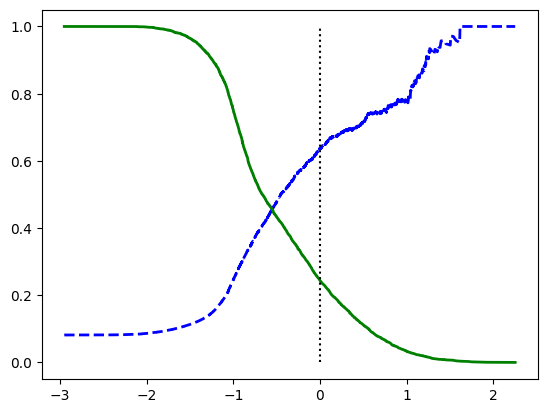

In [ ]:
plt.plot(thresholds, precisions[:-1], 'b--', label='precision', linewidth=2)
plt.plot(thresholds, recalls[:-1], 'g-', label='recall', linewidth=2)
plt.vlines(threshold, 0, 1.0, 'k', 'dotted', label='threshold')
plt.show()

In [ ]:
f1_scores = 2 * precisions * recalls / (precisions + recalls)

In [ ]:
precisions[precisions == recalls]

array([0.45608247])

In [ ]:
np.max(f1_scores)

0.4570121634265516

In [ ]:
cross_val_score(svm_clf, train_df, train_df['is_converted'],
                cv=5, scoring=make_scorer(f1_score))

array([0.4410328 , 0.20746888, 0.11997074, 0.17983651, 0.11599626])

In [ ]:
np.array([0.4410328 , 0.20746888, 0.11997074, 0.17983651, 0.11599626]).mean().round(3)

0.213

#### hyperparameter tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

'''
Hyperparameter tuning이 필요한 변수
- KNNImputer: n_neighbors
- SVM
'''

param_distribs = {
    'preprocessing__num_pipeline__knn_imputer__n_neighbors': randint(low=3, high=50),
    # 'SVM__degree': randint(low=3, high=50),
    'SVM__C': uniform(0.01, 10)
}

rnd_search = RandomizedSearchCV(
    svm_clf, param_distributions=param_distribs, n_iter=5, cv=3,
    scoring=make_scorer(f1_score), random_state=42
)

In [ ]:
rnd_search.fit(train_df, train_df['is_converted'])

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(transformers=[('num_pipeline',
                                                                               Pipeline(steps=[('knn_imputer',
                                                                                                KNNImputer()),
                                                                                               ('std_scaler',
                                                                                                StandardScaler())]),
                                                                               ['bant_submit',
                                                                                'com_reg_ver_win_rate',
                                                                                'customer_idx',
                                                                                'historical_existing_cnt',
                                                                                'id_strategic_ver',
                                                                                'it_strategic_ver',
                                                                                'idit_strategic_ver',
                                                                                'lead_desc_length'...
                                                                                'expected_timeline'])])),
                                             ('SVM', SVC(random_state=42))]),
                   n_iter=5,
                   param_distributions={'SVM__C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7a9db4e49990>,
                                        'preprocessing__num_pipeline__knn_imputer__n_neighbors': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7a9db4e49db0>},
                   random_state=42, scoring=make_scorer(f1_score))

In [ ]:
rnd_search.best_params_

{'SVM__C': 4.468327528535911,
 'preprocessing__num_pipeline__knn_imputer__n_neighbors': 25}

In [ ]:
rnd_search.best_score_

0.4839117989042934

## Approach 3. 결측치 보완 방식 다양화 + DT

## Approach 4. baseline + RF
public score: 0.17
- 과적합 문제일 가능성 높음